In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Standard libraries
from glob import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Override matplotlib defaults for nicer plots
sns.set(style='whitegrid')
# Make plots more latex-like looking
matplotlib.rcParams.update({
    'backend': 'ps',
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{gensymb}',
})

In [3]:
# Custom imports
from utils import G, target_density
from mcmc import rwmh, diagnose_plot
from utils import dump_simulation_results, load_simulation_results

In [4]:
def process_figure(filename):
    """Prettify figure (e.g. despine and make it latex-like) and save it to file"""
    sns.despine()
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')

In [5]:
df = pd.concat([
    pd.DataFrame(load_simulation_results(fpath)) for fpath in glob('data/rwmh_*.json.gz')
]).reset_index(drop=True).sort_values(['D', 's'])
df

,X,D,s,p_accept
0,"[0.0, 0.06016228464499908, 0.04784292988217376...",10,0.050,0.884888
1,"[0.0, 0.0, 0.16016005545099146, 0.160160055450...",10,0.100,0.750875
2,"[0.0, 0.2010949446929186, 0.39952787712380605,...",10,0.150,0.640164
3,"[0.0, 0.2406491385799963, 0.19137171952869506,...",10,0.200,0.546555
4,"[0.0, 0.0, 0.48048016635297436, 0.480480166352...",10,0.300,0.374037
5,"[0.0, 0.6703164823097287, 0.6703164823097287, ...",10,0.500,0.182718
6,"[0.0, -0.01573369801579178, 0.0525382163241156...",100,0.050,0.772477
7,"[0.0, -0.06524551001312011, 0.0344925739425354...",100,0.100,0.566857
8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.16608198721236725,...",100,0.150,0.394239
9,"[0.0, 0.0, 0.2730876573596296, 0.2730876573596...",100,0.200,0.253225


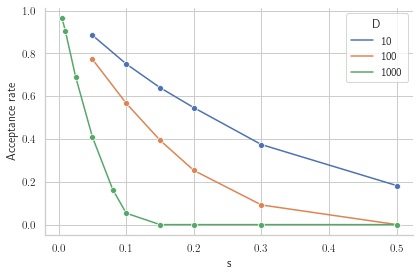

In [6]:
palette = sns.color_palette(n_colors=df.D.nunique())
sns.lineplot(x='s', y='p_accept', hue='D', data=df, marker='o', palette=palette)
plt.ylabel('Acceptance rate')
process_figure('figs/pcn_overview.pdf')

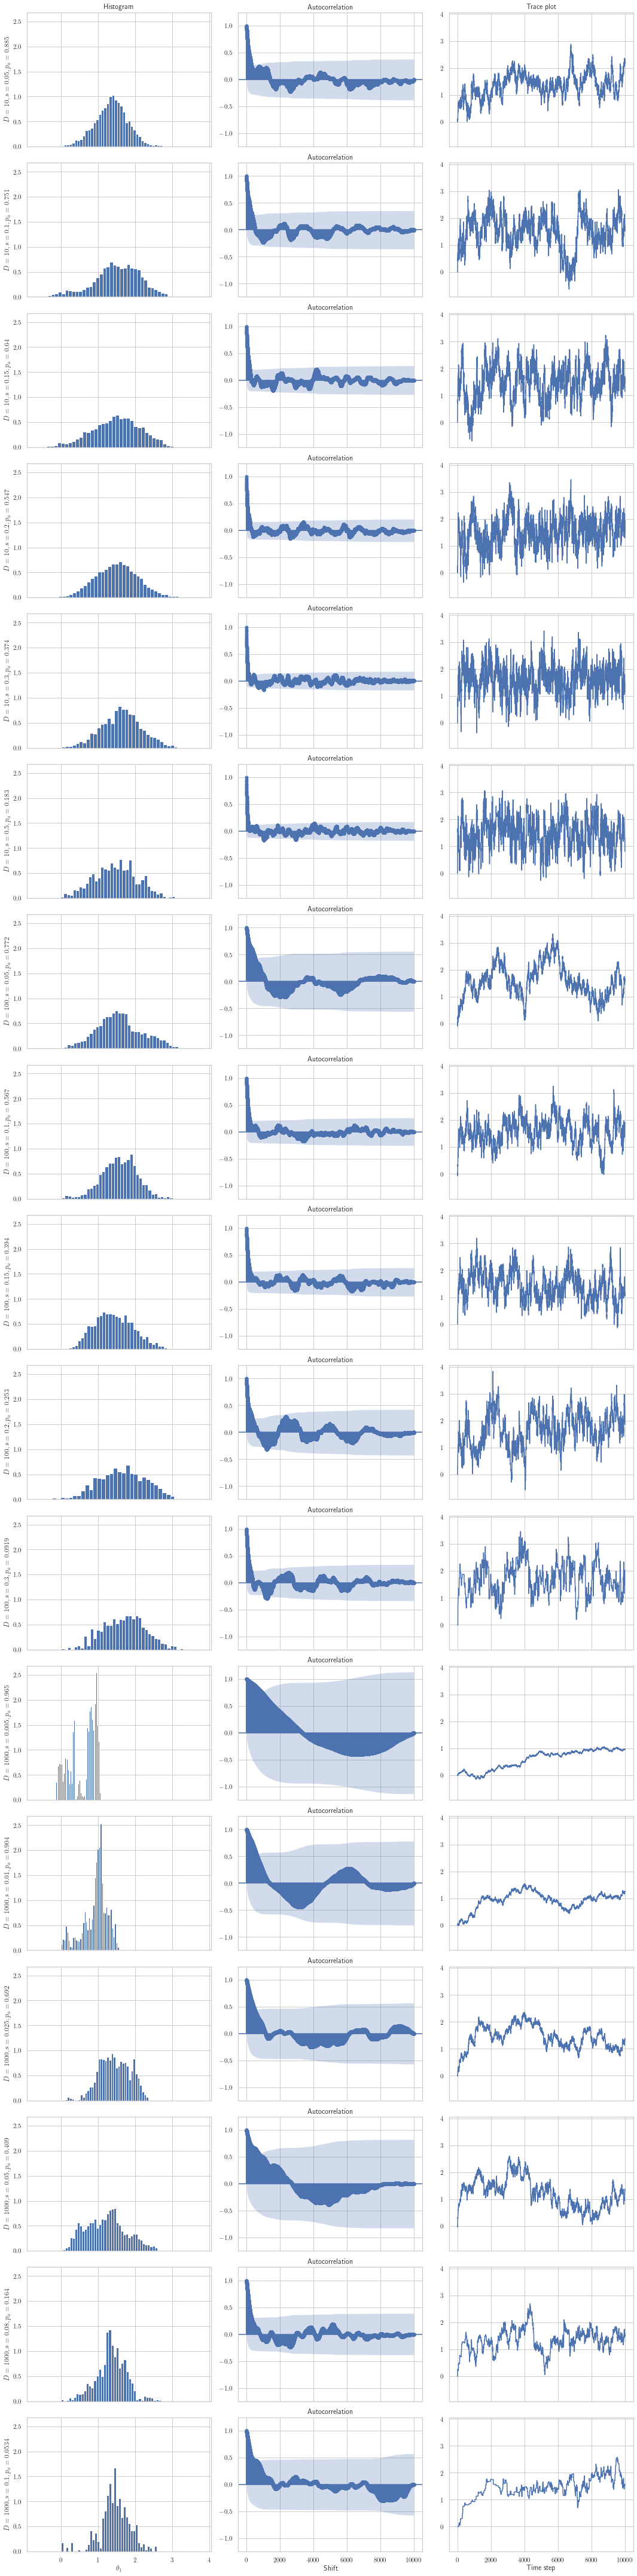

In [10]:
df_diagnosis = df[(df.p_accept > 0.01)]
labels = [
    f'$D = {row.D}, s = {row.s}, p_a = {row.p_accept:.3}$' for _, row in df_diagnosis.iterrows()
]
diagnose_plot(df_diagnosis.X, labels, r'$\theta_1$')

0.5000000000020618
0.5000000000003195
0.49999999999999495
0.4999999999999262
0.5000000000000651
0.49999999999976324
0.49999999999997147
0.49999999999993666
0.49999999999953654
0.5000000000009484
0.4999999999996931
0.49999999999972833
0.5000000000008307
0.49999999999952044
0.5000000000034769
0.5000000000007462
0.5000000000016716


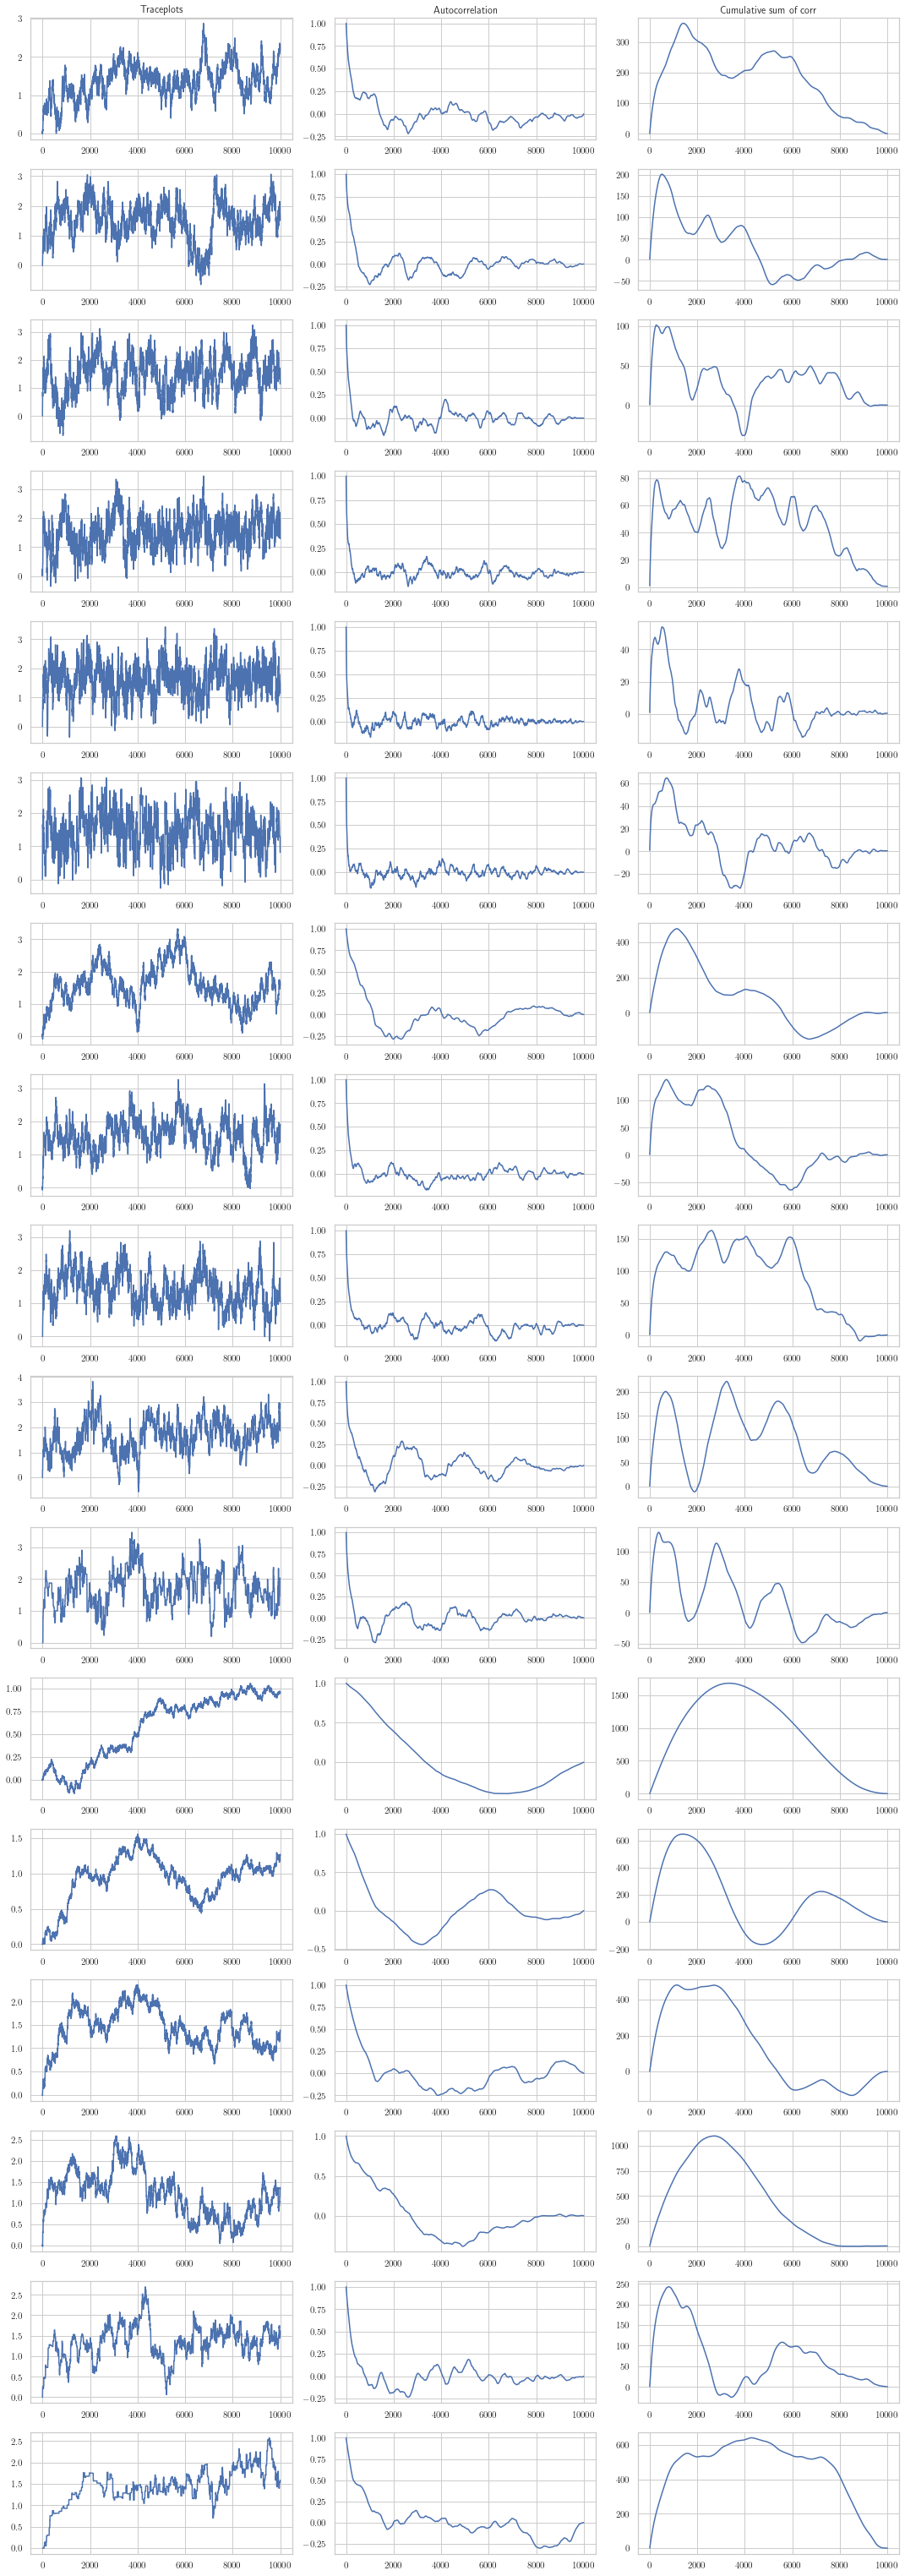

In [11]:
from statsmodels.tsa.stattools import acf

_, ax = plt.subplots(df_diagnosis.shape[0], 3, figsize=(15, df_diagnosis.shape[0]*2.5))
for (_, row), a in zip(df_diagnosis.iterrows(), ax):
    x = row.X
    a[0].plot(x)
    c = acf(x, nlags=x.size-1, fft=True)
    a[1].plot(c)
    cs = np.cumsum(c)
    a[2].plot(cs)
    print(cs[-1])

ax[0, 0].set_title('Traceplots')
ax[0, 1].set_title('Autocorrelation')
ax[0, 2].set_title('Cumulative sum of corr')
plt.tight_layout()

In [20]:
1e4/30

333.3333333333333